***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/spk-core-certified-user/blob/main/README.md) >

## Splunk
###### Topic: ``Core Certified User``
***

<a id="top"></a>
***
## Table of Contents
***

### [Statistical Processing](#StatisticalProcessing) <br/><br/>

- [Timechart Command](#StatisticalProcessingc) <br/><br/>

<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="StatisticalProcessing"></a>
***
### Statistical Processing
***

< [Table of Contents](#top) | [References](#references) >
<a id="StatisticalProcessingc"></a>
***
###### ``| timechart``
***

The ``timechart`` command performs stats aggregations against time - ``_time`` is always the X-axis. 

With ``timechart``, we can perform statistical aggregations against time and return a **Time Series**, chart or table. 

- Function used will determine what populates the Y-axis of our chart. 


- The X-axis will always be split by ``_time``. 

The syntax for the ``timechart`` command is very similar to ``chart`` - functions and arguments used with ``stats`` and ``chart`` can also be used with ``timechart``. 

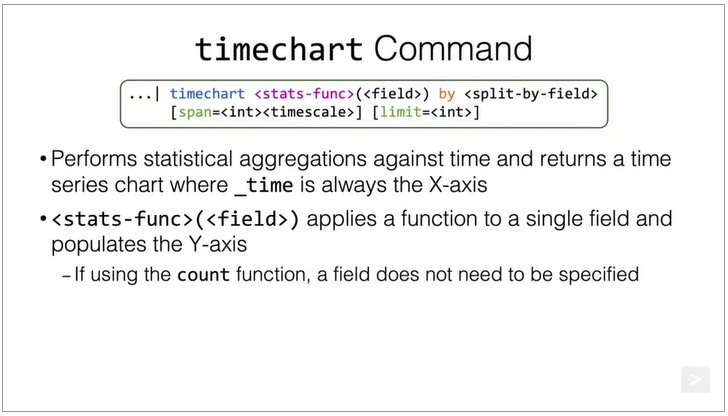

Like with the ``chart`` command, we can choose to split our results table. 

A key difference between ``chart`` and ``timechart``, however, is the ``timechart`` only supports a single additional split - this is because our X-axis is automatically segmented or bucketed based on time. 

When using the ``timechart`` command, we can further control time chart behavior by using the ``span`` and ``limit`` options. 

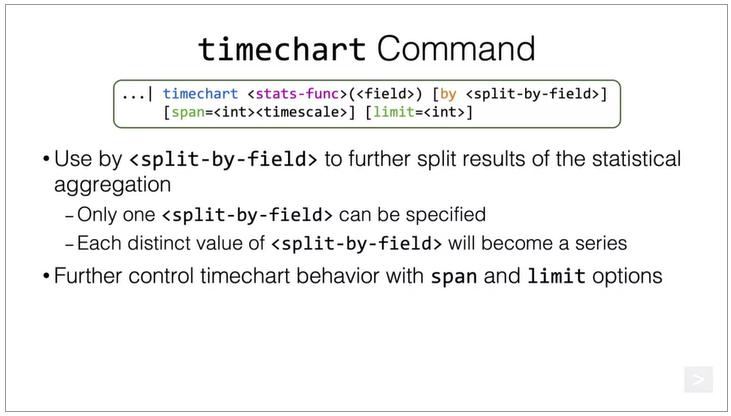

- Been asked how many events have been logged onto the Cisco web security appliance in the last seven days:

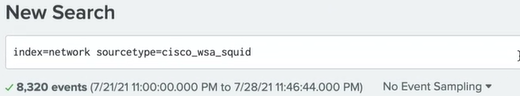

- Could simply count the number of events with the ``chart count`` command:

However, this doesn't show us how that count is split over the last seven days. 

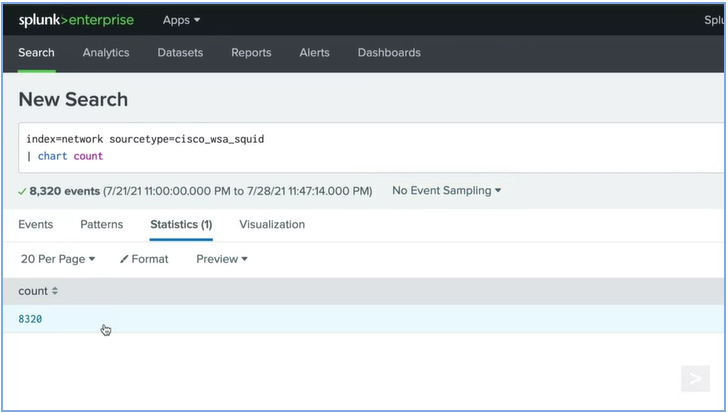

- For that, we should use the ``timechart`` command:

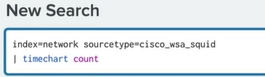

Can see here that our leftmost column becomes split by ``_time`` and our rightmost columns are an aggregated ``count`` within each time bucket.

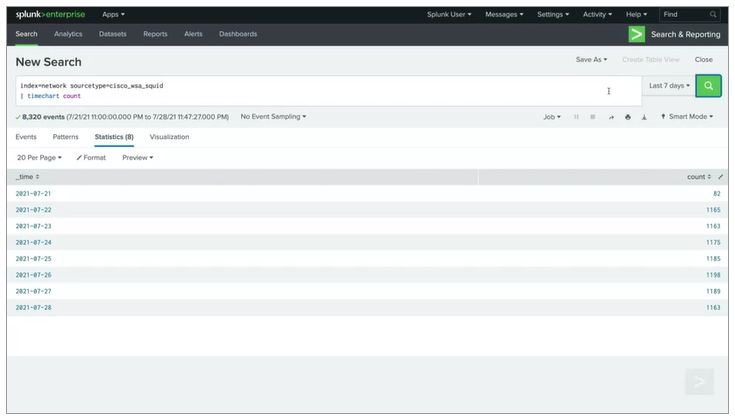

This can be best represented as a line chart visualization, but you are free to use other visualization types if you choose. 

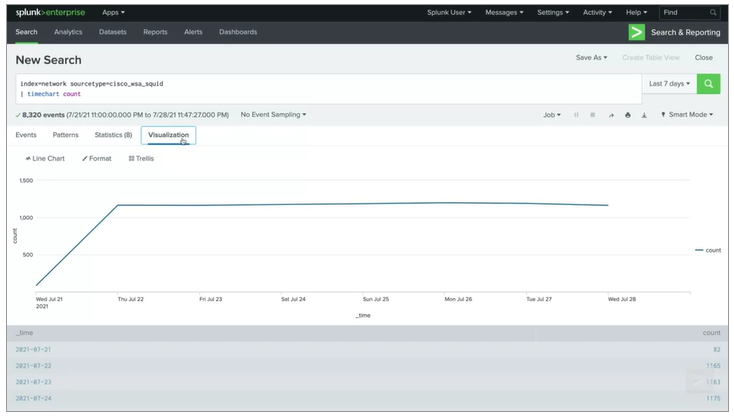

- The security team wants to see the previous report, but split by the different types of ``usage``:

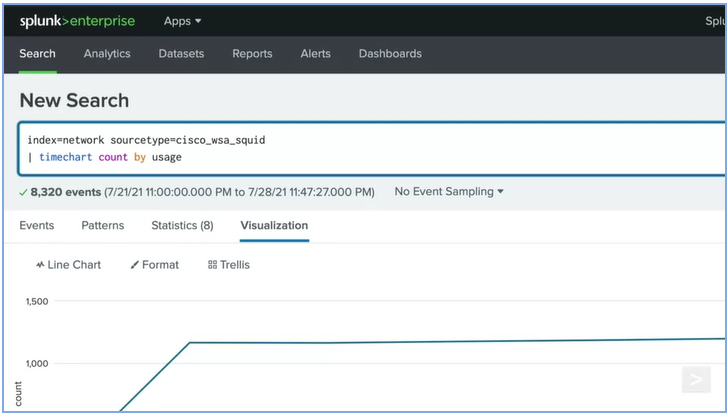

In this case, the values in the field ``usage`` become the different series shown on the ``timechart``.

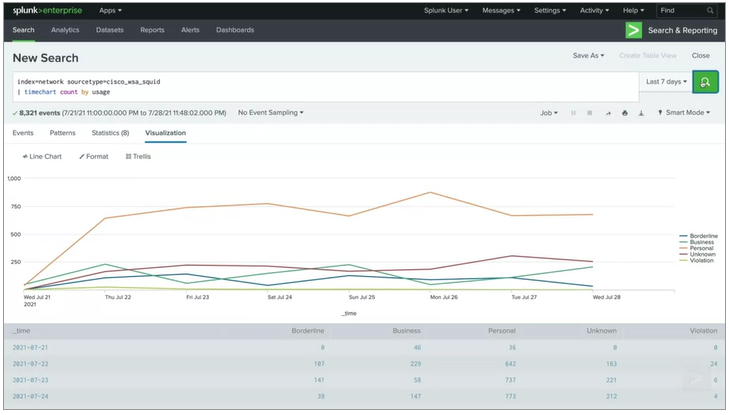

The functional equivalent search using ``chart`` would be:

```sql
| chart count by time, usage
```

But ``timechart`` automatically applies a bucket command to set the time span to a preset sampling interval. 

**Remember, you can only split by one field with ``timechart``.**

When using the ``timechart`` command, Splunk will automatically decide what the appropriate buckets for the values of the ``_time`` field will be. 

It does this based on the time range of your search - for example, using the ``timechart`` command for a search over the last 24 hours will make Splunk aggregate the results into 30 minute buckets. 

A 60 minute search will aggregate results into one minute buckets. 

We can see this reflected in the ``stats`` table output by the search in this slide - each row represents a chunk or bucket of aggregated data. 

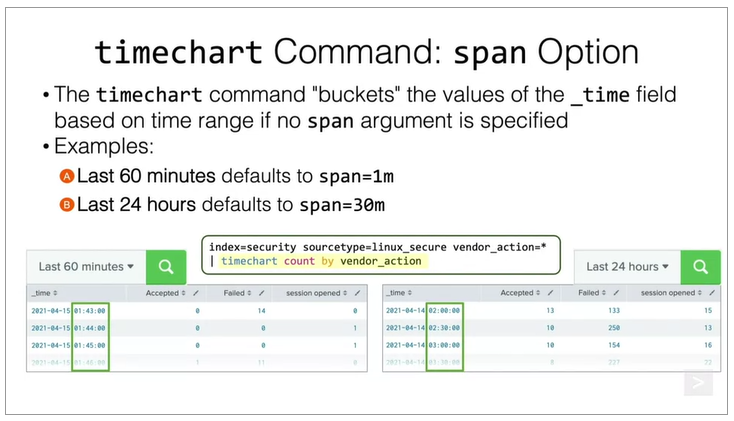

It's possible, even common, that you may not find the time period Splunk uses in this process appropriate - if that's the case, you can override Splunk bucketing choice by using the ``span`` argument.

By putting ``span`` equals some period of time, you can force Splunk to group buckets based on the time range that works best for you. 

In this example, we can see that putting an argument of ``span=15m`` forces Splunk to group data into 15 minute buckets.

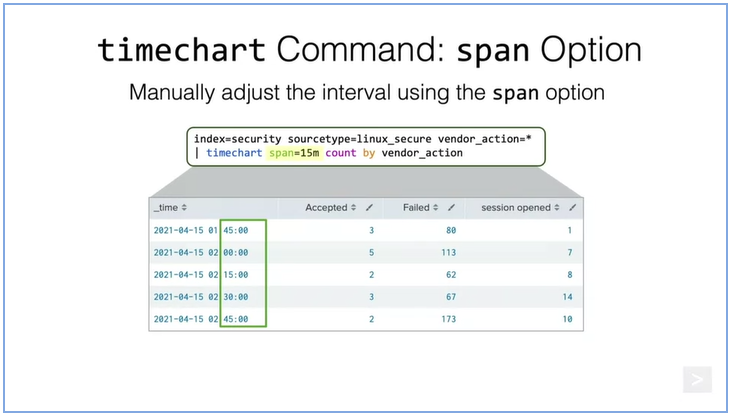

Can also use the ``limit`` argument with ``timechart`` in order to control the number of values returned to us for our **Multi-series** split. 

In this slide, we've been asked what the top total web sales for the top five products was during the last 24 hours - from the search syntax, we can see that we have chosen to aggregate our data into one hour buckets with the ``span=1h`` argument. 

Our statistical function in this case is ``sum``, and the field we are getting for the ``sum`` is ``price`` - this means that we are getting a sum of all the values in the ``price`` field. 

We are then splitting our data by the values found in the ``product_name`` field.

Without the ``limit`` argument, we would have had the top 10 products returned to us with 11 lines on our chart, 10 for our products, and one additional series for ``OTHER``. By adding ``limit=5``, however, we are returning only the top five values for ``product_name`` along with, of course, ``OTHER``.

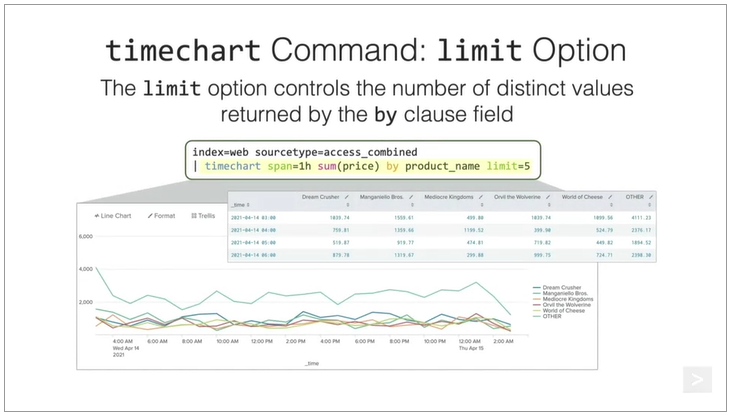

The ``timechart`` and ``chart`` commands both take advantage of the same statistical functions - can equally use ``count``, ``sum``, ``average`` just to name a few in either command. 

All functions supported by ``chart``, ``timechart`` and ``stats`` can be found in the search manual online in our documentation. 

In this slide's example, we can see that we're asked what the total web sales for our top products was during the last 24 hours. 

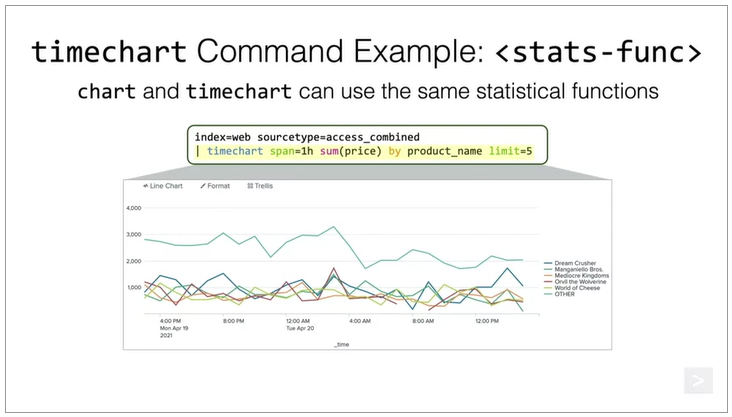

Showing a quick example of the different ways that ``timechart`` treats time compared to ``chart``.

- Looking at [ [``access_combined``](https://docs.splunk.com/Documentation/Splunk/9.0.2/Data/Listofpretrainedsourcetypes) ] data:

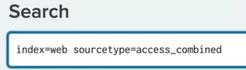

- See what happens when we split our data using the ``chart`` command, but with ``_time`` as our primary series:

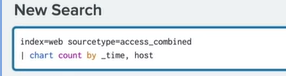

Here we are running a **Multi-series** split with ``_time`` as our principal split value. 

Notice the bucketing in the left: there is none. 

Every time we see a different value in the ``host`` field, Splunk considers that a separate series. 

Can see that the ``_time`` has no aggregation whatsoever - any time there's a ``host``, we get a new row. 

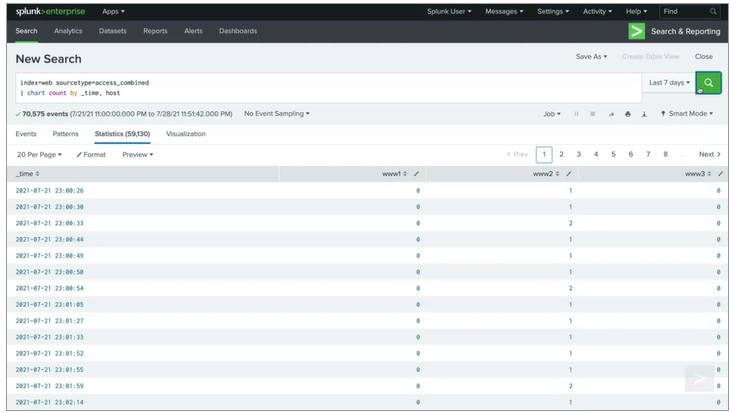

- Contrast this with how ``timechart`` aggregates data into buckets:

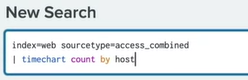

Can see how the ``timechart`` command has allowed us to aggregate values in the ``host`` field based on ``_time`` as opposed to the ``chart`` command, which gave each ``host`` value its own time bucket. 

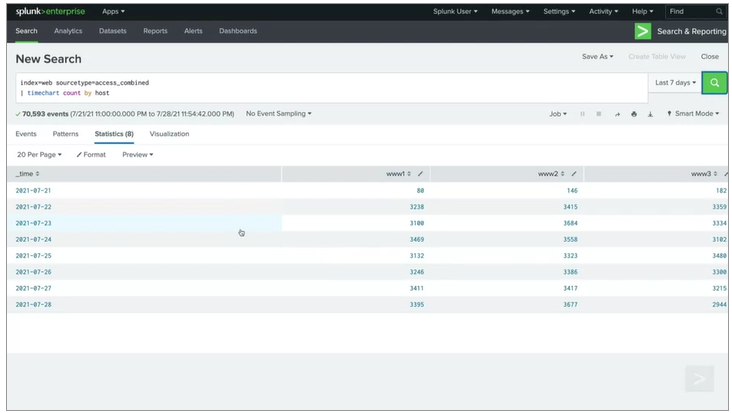

When running a **Multi-series** ``timechart``, we have an option how we want our data to be displayed. 

Given multiple values in our **Multi-series** split, our ``timechart`` can sometimes appear more cluttered than is useful to us because of this we have the option to toggle a feature called ``Multi-series Mode``.

This mode defaults to ``No`` which gets us a ``timechart``, as we can see here. 

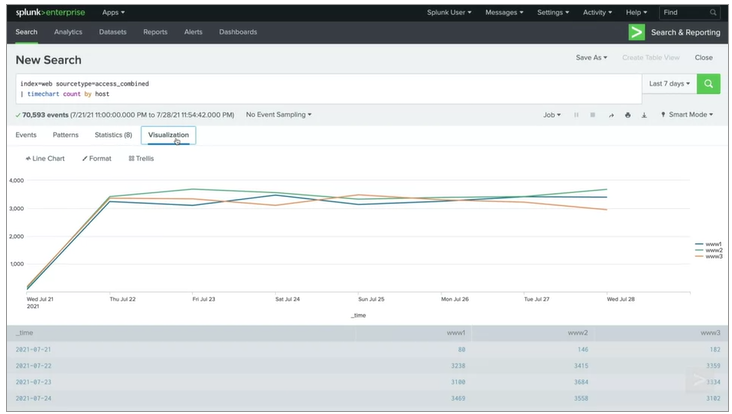

If we click on the ``Format`` button, however, we have the option to turn ``Multi-series Mode`` to ``Yes``.

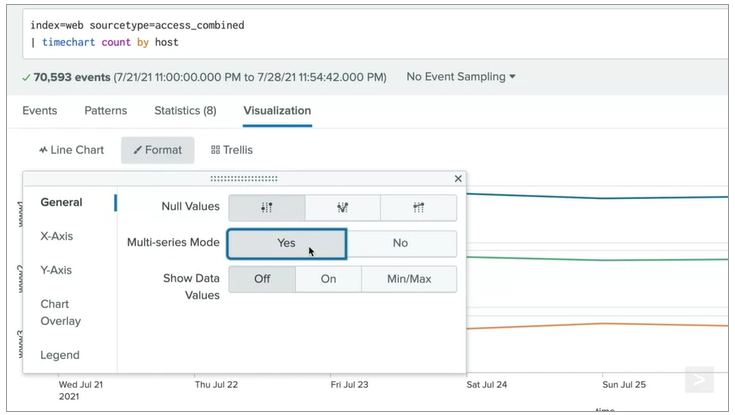

This will separate out our different values into their own lanes on our chart. 

They share the same X-axis but at this point, they all have their own individual Y-axis, almost like their own swim lanes. 

Toggling this ``Multi-series Mode`` to ``Yes`` can be useful in clearing up order of activity in your data. 

**Note that with ``Multi-series Mode``, although the different values now have their own Y-axis, each one is still uniform in its ceiling and floor.**

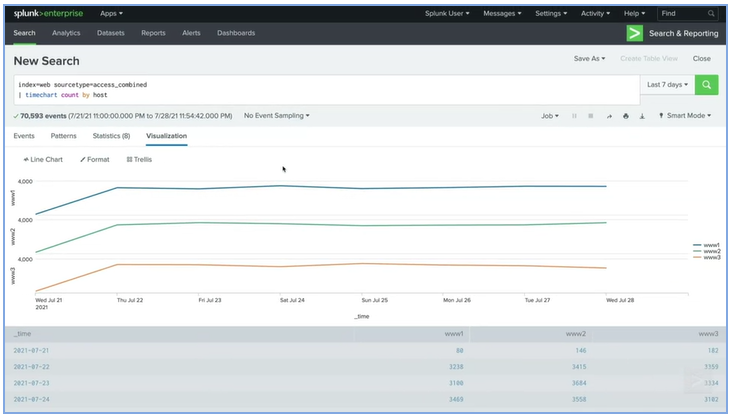

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Splunk, "Splunk Education Portal," [education.splunk.com](https://education.splunk.com/), n.d..

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [1]:
from IPython.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK